In [39]:
!pip install keras
!pip install tensorflow
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [40]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [79]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\ELCOT\Desktop\Dataset\train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(r"C:\Users\ELCOT\Desktop\Dataset\test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [80]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [81]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 81s 5s/step - loss: 0.5733 - accuracy: 0.7294 - val_loss: 0.2002 - val_accuracy: 0.9752
Epoch 2/10
14/14 [==============================] - 69s 5s/step - loss: 0.3218 - accuracy: 0.8624 - val_loss: 0.3858 - val_accuracy: 0.8264
Epoch 3/10
14/14 [==============================] - 63s 4s/step - loss: 0.2746 - accuracy: 0.8968 - val_loss: 0.0589 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 63s 4s/step - loss: 0.2224 - accuracy: 0.9106 - val_loss: 0.0789 - val_accuracy: 0.9587
Epoch 5/10
14/14 [==============================] - 79s 6s/step - loss: 0.1764 - accuracy: 0.9312 - val_loss: 0.0516 - val_accuracy: 0.9917
Epoch 6/10
14/14 [==============================] - 69s 5s/step - loss: 0.1358 - accuracy: 0.9541 - val_loss: 0.0311 - val_accuracy: 0.9917
Epoch 7/10
14/14 [==============================] - 66s 5s/step - loss: 0.1238 - accuracy: 0.9427 - val_loss: 0.0434 - val_accuracy: 0.9917
Epoch 8/10
14/14 [==

In [84]:
model.save("forest1.h5")

In [85]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 15s 4s/step


In [86]:
predictions

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [87]:
print(len(predictions))

121


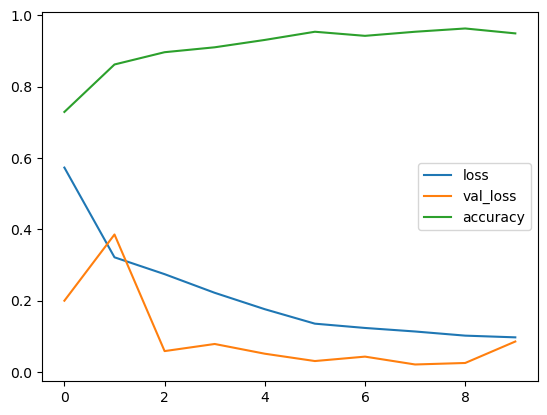

In [88]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

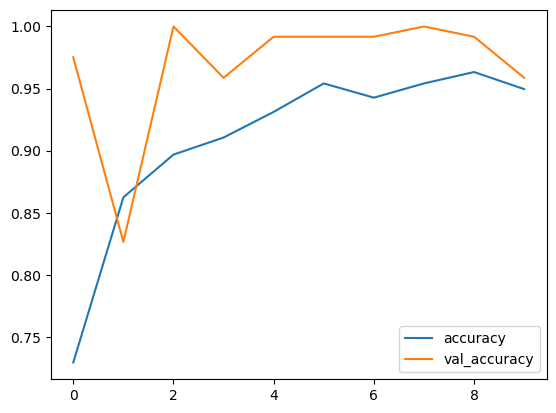

In [89]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [90]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 266ms/step
[[1.]]


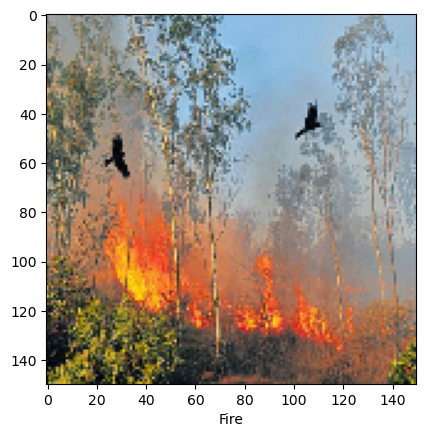

In [91]:
predictImage(r"C:\Users\ELCOT\Desktop\Dataset\test_set\with fire\599857.jpg")

1/1 [==============================] - 0s 63ms/step
[[0.]]


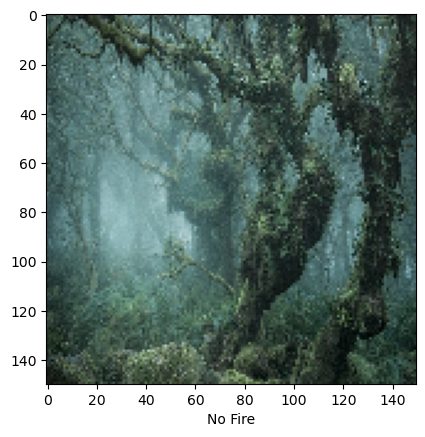

In [92]:
predictImage(r"C:\Users\ELCOT\Desktop\Dataset\test_set\forest\01_NeilBurnell_Mystical_photoverticall.jpg")

1/1 [==============================] - 0s 63ms/step
[[1.]]


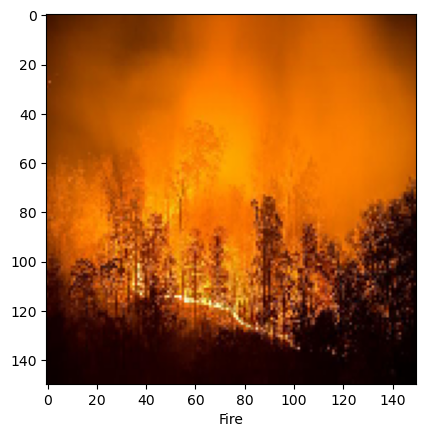

In [93]:
predictImage(r"C:\Users\ELCOT\Desktop\Dataset\train_set\with fire\with fire (2).jpg")

1/1 [==============================] - 0s 63ms/step
[[0.]]


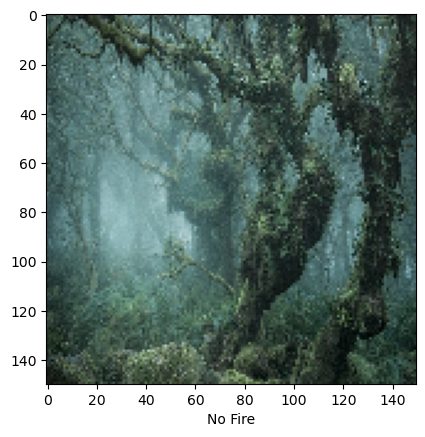

In [94]:
predictImage(r"C:\Users\ELCOT\Desktop\Dataset\test_set\forest\01_NeilBurnell_Mystical_photoverticall.jpg")

1/1 [==============================] - 0s 78ms/step
[[1.]]


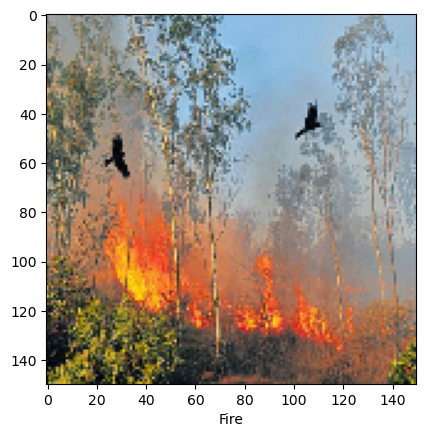

In [95]:
predictImage(r"C:\Users\ELCOT\Desktop\Dataset\test_set\with fire\599857.jpg")